Assignment-2:  K- Nearest Neighbors 

A. Get the Data: 

1.  Import pandas, seaborn, and the usual libraries. 

In [2]:
# Import the pandas library for data manipulation and analysis.
# Pandas provides data structures like DataFrames that make it easy to work with structured data.
import pandas as pd  

# Import the numpy library for numerical operations and handling arrays.
# Numpy is essential for scientific computing in Python, providing support for large, multi-dimensional arrays and matrices.
import numpy as np  

# Import the pyplot module from the matplotlib library for plotting and visualizations.
# Pyplot provides a MATLAB-like interface for creating static, animated, and interactive visualizations in Python.
from matplotlib import pyplot as plt  

# Import the seaborn library for statistical data visualization.
# Seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns  


2. Read the KNN_Project_Data csv file into a dataframe.

In [3]:
# Load a CSV file into a pandas DataFrame.
# The read_csv function reads the specified CSV file and converts it into a DataFrame, which is a 2-dimensional labeled data structure.
df = pd.read_csv('KNN_Project_Data.csv')  


3. Check the head of the dataframe. 

In [4]:
# Display the first five rows of the DataFrame to inspect the data.
df.head()  


XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742175   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

4.Create a pairplot with the hue indicated by the TARGET CLASS column using seaborn on the dataframe.

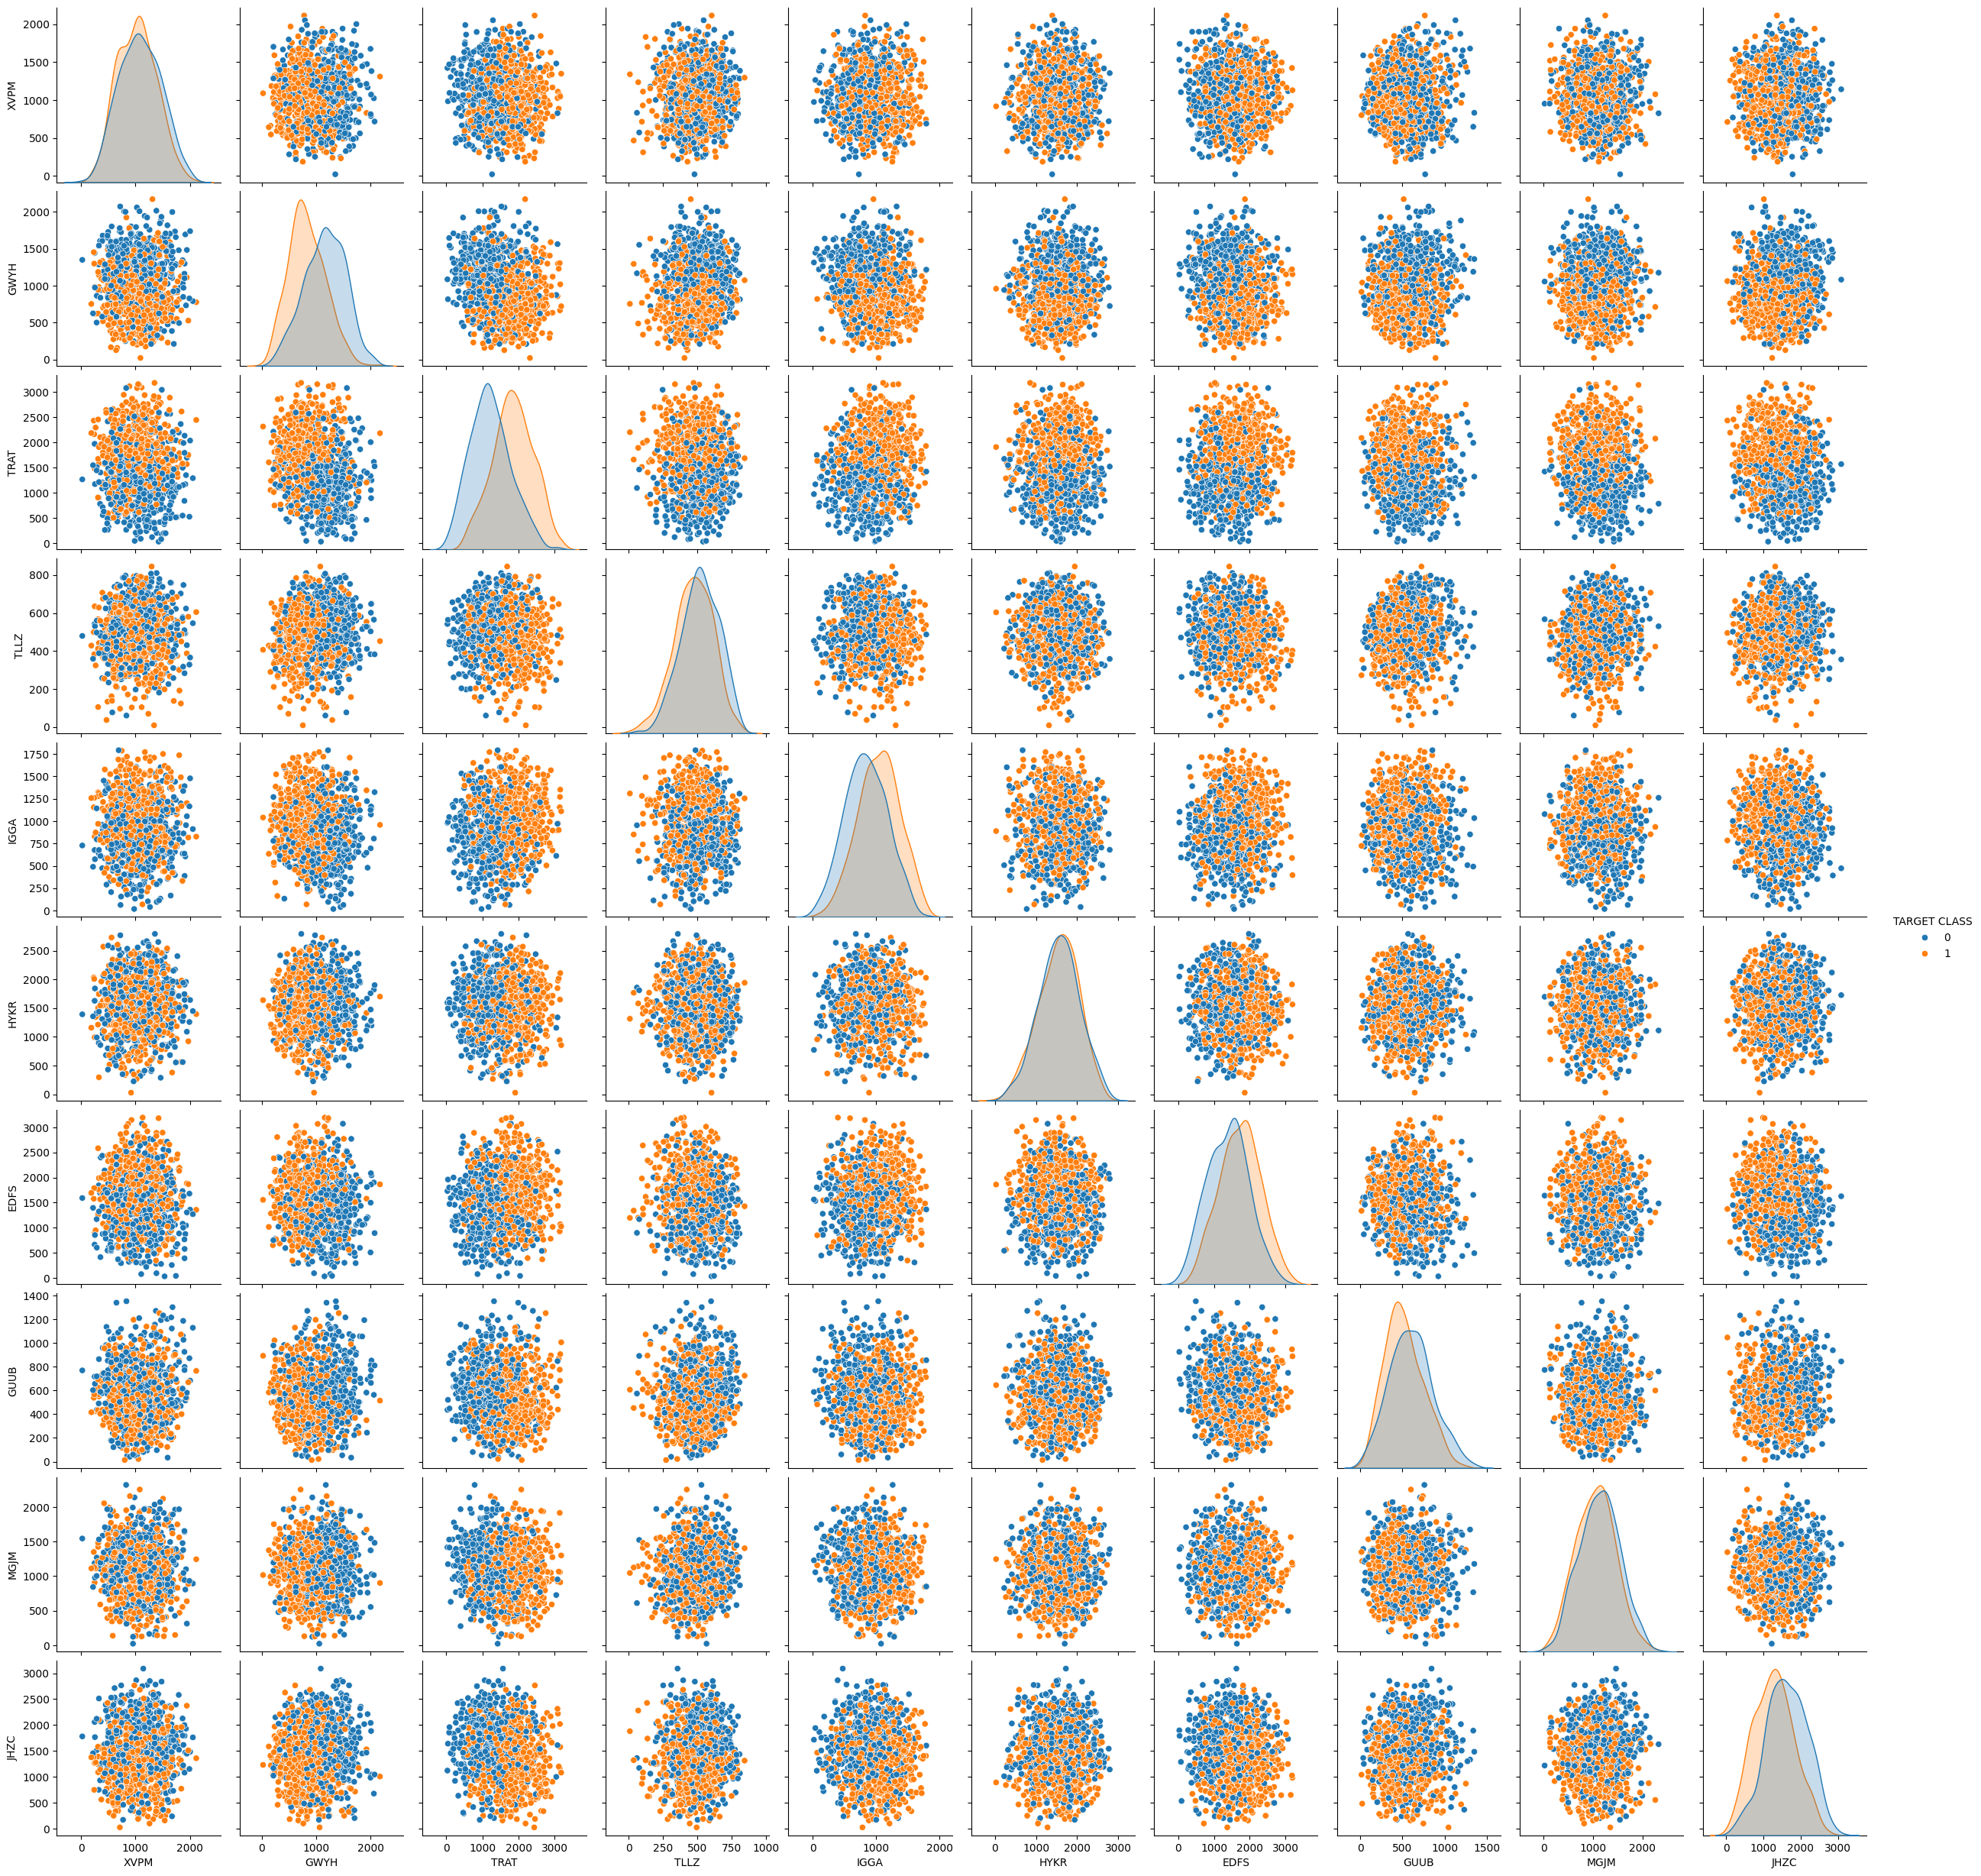

In [6]:
# Create a pairplot using the seaborn library to visualize relationships between features in the DataFrame.
# The 'hue' parameter specifies the column used for color coding the points based on the 'TARGET CLASS' variable.
sns.pairplot(df, hue='TARGET CLASS')  

# Display the pairplot.
plt.show()  


B. Standardize the Variables:

1. Import StandardScaler from Scikit learn

In [8]:
# Import the StandardScaler class from the sklearn.preprocessing module.
# StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler  


2. Create a StandardScaler() object called scaler. 


In [10]:
# Instantiate the StandardScaler object.
# This creates a scaler that will standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()  


3. Fit scaler to the features

In [11]:
# Drop the 'TARGET CLASS' column from the DataFrame 'df' to create a new DataFrame 'features'.
# This is done to exclude the target variable from the feature set used for scaling and modeling.
features = df.drop('TARGET CLASS', axis=1)  # Drop the target column

# Fit the StandardScaler to the features DataFrame.
# This step calculates the mean and standard deviation for each feature in the DataFrame.
scaler.fit(features)  


StandardScaler()

4. Use the .transform() method to transform the features to a scaled version. 


In [12]:
# Transform the features DataFrame using the fitted StandardScaler.
# This step standardizes the features by removing the mean and scaling to unit variance,
# based on the parameters (mean and standard deviation) learned during the fitting process.
scaled_features = scaler.transform(features)  


5. Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling 
worked

In [13]:
# Convert the NumPy array of scaled features back into a pandas DataFrame.
# This allows for easier manipulation and inspection of the standardized feature data.
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Print the first five rows of the scaled DataFrame to inspect the standardized features.
print(scaled_df.head())  


       XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762  


6. Use train_test_split to split your data into a training set and a testing set.(Make a test set considering 30% of 
total data)

In [15]:
# Import the train_test_split function from the sklearn.model_selection module.
# This function is used to split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# Split the scaled features and target variable into training and testing sets.
# - scaled_df: DataFrame containing the standardized features.
# - df['TARGET CLASS']: Series containing the target variable.
# - test_size=0.3: Specifies that 30% of the data should be used for testing.
# - random_state=42: Ensures reproducibility of the results by setting a seed for random number generation.
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df, df['TARGET CLASS'], test_size=0.3, random_state=42
)  


C. Using KNN: 

1. Import KNeighborsClassifier from scikit learn. 


In [16]:
# Import the KNeighborsClassifier class from the sklearn.neighbors module.
# KNeighborsClassifier is a machine learning algorithm that implements the K-Nearest Neighbors algorithm for classification tasks.
from sklearn.neighbors import KNeighborsClassifier  


2. Create a KNN model instance with n_neighbors=1 


In [17]:
# Instantiate the KNeighborsClassifier with the number of neighbors (k) set to 1.
# This means that the classification decision for each test sample will be based solely on the closest training sample.
knn = KNeighborsClassifier(n_neighbors=1)  


3. Fit this KNN model to the training data. 


In [18]:
# Fit the KNeighborsClassifier instance (knn) to the training data.
# This step trains the model using the feature set (X_train) and the target variable (y_train).
knn.fit(X_train, y_train)  


KNeighborsClassifier(n_neighbors=1)

D. Predictions and Evaluations 


1. Use the predict method to predict values using your KNN model and X_test. 


In [20]:
# Use the fitted KNeighborsClassifier (knn) to predict the class labels for the test set (X_test).
# This step applies the KNN algorithm to classify each sample in the test set based on the trained model.
predictions = knn.predict(X_test)  


2. Create a confusion matrix and classification report. 


In [22]:
# Import confusion_matrix and classification_report from sklearn.metrics for model evaluation.
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix by comparing the actual labels (y_test) and the predicted labels (predictions).
# The confusion matrix provides insights into the performance of the classification model by showing true positives,
# true negatives, false positives, and false negatives.
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix.
print("Confusion Matrix:\n", cm)

# Generate a classification report that includes precision, recall, F1-score, and support for each class.
# This report provides a more detailed performance metric than the confusion matrix.
cr = classification_report(y_test, predictions)

# Print the classification report.
print("Classification Report:\n", cr)


Confusion Matrix:
 [[110  36]
 [ 47 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



E. Choosing a K Value

1. Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for 
each of these models with a list. 

In [23]:
# Import numpy for numerical operations
import numpy as np

# Initialize an empty list to store the error rates for different values of k.
error_rate = []

# Loop through k values from 1 to 40 to evaluate the KNN classifier's performance.
for k in range(1, 41):
    # Instantiate the KNeighborsClassifier with the current value of k.
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the KNN model to the training data.
    knn.fit(X_train, y_train)
    
    # Predict the class labels for the test set.
    pred_k = knn.predict(X_test)
    
    # Calculate the error rate as the mean of incorrect predictions.
    # np.mean(pred_k != y_test) computes the proportion of incorrect predictions.
    error = np.mean(pred_k != y_test)
    
    # Append the error rate for the current k to the error_rate list.
    error_rate.append(error)
    
    # Print the current value of k and the corresponding error rate, rounded to 4 decimal places.
    print('k =', k, ': Error Rate =', round(error, 4))

# Find the minimum error rate from the error_rate list.
min_error_rate = min(error_rate)

# Find the index of the best k value that gives the lowest error rate.
# Adding 1 because the range starts from 1.
best_k = error_rate.index(min_error_rate) + 1

# Print the lowest error rate and the corresponding best k value.
print('\nThe lowest error rate is', round(min_error_rate, 4), 'at k =', best_k)


k = 1 : Error Rate = 0.2767
k = 2 : Error Rate = 0.27
k = 3 : Error Rate = 0.2233
k = 4 : Error Rate = 0.2333
k = 5 : Error Rate = 0.22
k = 6 : Error Rate = 0.2
k = 7 : Error Rate = 0.19
k = 8 : Error Rate = 0.1867
k = 9 : Error Rate = 0.1767
k = 10 : Error Rate = 0.19
k = 11 : Error Rate = 0.1833
k = 12 : Error Rate = 0.1833
k = 13 : Error Rate = 0.17
k = 14 : Error Rate = 0.1667
k = 15 : Error Rate = 0.1667
k = 16 : Error Rate = 0.1667
k = 17 : Error Rate = 0.1667
k = 18 : Error Rate = 0.17
k = 19 : Error Rate = 0.1633
k = 20 : Error Rate = 0.1667
k = 21 : Error Rate = 0.1567
k = 22 : Error Rate = 0.1633
k = 23 : Error Rate = 0.17
k = 24 : Error Rate = 0.1667
k = 25 : Error Rate = 0.17
k = 26 : Error Rate = 0.1633
k = 27 : Error Rate = 0.16
k = 28 : Error Rate = 0.16
k = 29 : Error Rate = 0.16
k = 30 : Error Rate = 0.16
k = 31 : Error Rate = 0.1567
k = 32 : Error Rate = 0.16
k = 33 : Error Rate = 0.16
k = 34 : Error Rate = 0.1633
k = 35 : Error Rate = 0.17
k = 36 : Error Rate = 0.166

2. Now create a plot using the information from your ‘for loop’. 


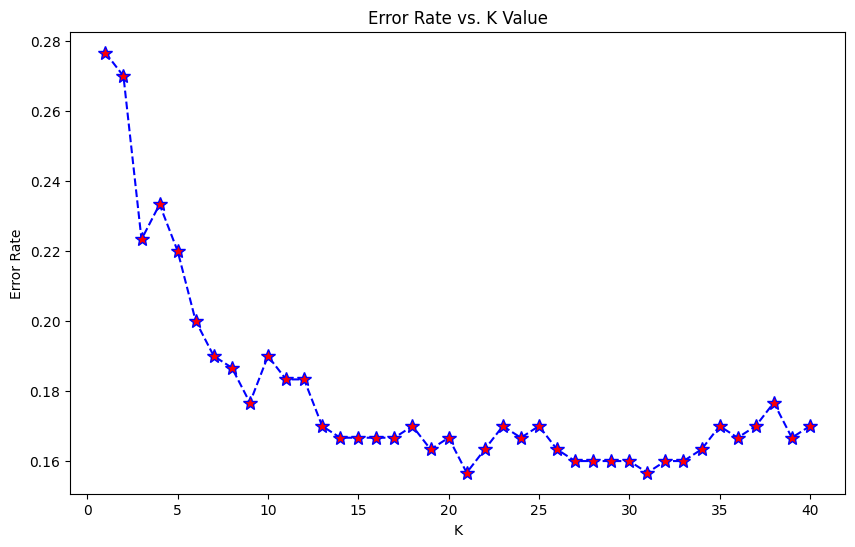

In [24]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a new figure with a specified size (10 inches wide and 6 inches tall).
plt.figure(figsize=(10, 6))

# Plot the error rates against the values of k from 1 to 40.
# The line is styled with a dashed line and star markers.
plt.plot(range(1, 41), error_rate, 
         color='blue',                   # Line color set to blue
         linestyle='dashed',            # Dashed line style
         marker='*',                    # Marker style set to a star
         markerfacecolor='red',         # Marker color set to red
         markersize=10)                 # Marker size set to 10

# Set the title of the plot.
plt.title('Error Rate vs. K Value')

# Label the x-axis.
plt.xlabel('K')

# Label the y-axis.
plt.ylabel('Error Rate')

# Display the plot.
plt.show()


F. Retrain with new K Value 


1. Retrain your model with the best K value (up to you to decide what you want. 


In [25]:
# Set the optimal number of neighbors (k) based on previous analysis.
best_k = 21  

# Instantiate the KNeighborsClassifier with the selected best_k value.
knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the KNN model to the training data (X_train, y_train).
# This trains the model using the specified number of neighbors.
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=21)

2. Re-do the classification report and the confusion matrix. 


In [26]:
# Use the trained KNN model with the best k value to make predictions on the test set.
predictions_best_k = knn.predict(X_test)

# Calculate the confusion matrix by comparing the actual labels (y_test) with the predicted labels (predictions_best_k).
# The confusion matrix provides insights into the performance of the classification model.
cm_best_k = confusion_matrix(y_test, predictions_best_k)

# Print the confusion matrix, indicating the model's performance with the selected k value.
print("Confusion Matrix with k=", best_k, ":\n", cm_best_k)

# Generate a classification report that includes precision, recall, F1-score, and support for each class.
# This report provides a comprehensive overview of the model's performance.
cr_best_k = classification_report(y_test, predictions_best_k)

# Print the classification report for the model with the best k value.
print("Classification Report with k=", best_k, ":\n", cr_best_k)


Confusion Matrix with k= 21 :
 [[125  21]
 [ 26 128]]
Classification Report with k= 21 :
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.86      0.83      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



3. Is there any achievement with the best k value over the previously taken k value? 

The optimized KNN model with `k=21` shows significant improvement over the previous model with `k=1`. The confusion matrix reveals more correct classifications and fewer errors, with increased true positives and true negatives. The classification report indicates better precision, recall, and F1-scores for both classes, with overall accuracy improving from 0.72 to 0.84. This demonstrates that `k=21` provides a more accurate and reliable model for this dataset.